
# Replicating a Paper
This notebook is being used to replicate a paper titled 
 ["A Topological “Reading” Lesson: Classification of
MNIST using TDA"](https://arxiv.org/abs/1910.08345)

Topological Data analysis helps in understanding morphology of images and gives better performance over traditional computer vision techniques

I'm replicating this code to implement this algorithm in a robust way to regional handwritten texts such as my mother tongue Bengali.



In [6]:
%pip install giotto-tda
%pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np 
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
#from gtda.images import Binarizer

In [ ]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
X.to_csv('/content/drive/MyDrive/Github/TDA_on_MNIST/data/X.csv', index = False)

AttributeError: ignored

In [ ]:
Y.to_csv('/content/drive/MyDrive/Github/TDA_on_MNIST/data/Y.csv', index = False)

In [8]:
X = pd.read_csv('/content/drive/MyDrive/Github/TDA_on_MNIST/data/X.csv')
Y = pd.read_csv('/content/drive/MyDrive/Github/TDA_on_MNIST/data/Y.csv')

In [9]:
print(f"Shape of X: {np.shape(X)}, Shape of Y: {np.shape(Y)}")

Shape of X: (70000, 784), Shape of Y: (70000, 1)


In [ ]:
Y[1:8]

,class
1,0
2,4
3,1
4,9
5,2
6,1
7,3


In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#X.loc[17]
X = X.to_numpy()
Y = Y.to_numpy().reshape(70000, )
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
print(X.shape)
print(Y.shape)
Y[17]

(70000, 784)
(70000,)


8

In [12]:
from gtda.plotting import plot_heatmap

im8_idx = np.flatnonzero(Y == 8)[0]
img8 = X[im8_idx].reshape(28, 28)
plot_heatmap(img8)

In [14]:
from sklearn.model_selection import train_test_split

train_size, test_size = 6000, 1000

# Reshape to (n_samples, n_pixels_x, n_pixels_y)
X = X.reshape((-1, 28, 28))

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=train_size, test_size=test_size, stratify = Y, random_state=666
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (6000, 28, 28), y_train shape: (6000,)
X_test shape: (1000, 28, 28), y_test shape: (1000,)


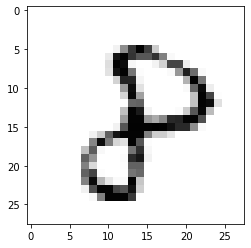

In [ ]:
from gtda.images import Binarizer
im8_idx_train = np.flatnonzero(y_train == 8)[0]
img8_train = X_train[im8_idx_train]
plt.imshow(img8_train, cmap = 'Greys')
plt.savefig('/content/drive/MyDrive/Github/TDA_on_MNIST/figures/grayscale_8.png')
#plot_heatmap(img8_train)
#img8_train.shape

(28, 28)
<class 'numpy.ndarray'>


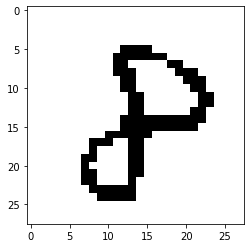

In [ ]:
#after picking the image, now we binarize it
binarizer_model = Binarizer(threshold=0.4)
im8_binarized = binarizer_model.fit_transform(img8_train)
print(im8_binarized.shape)
print(type(im8_binarized))
plt.imshow(im8_binarized, cmap = 'Greys')
plt.savefig('/content/drive/MyDrive/Github/TDA_on_MNIST/figures/binarized_8.png')
#plot_heatmap(im8_binarized)

(28, 28)
(1, 28, 28)
(1, 28, 28)


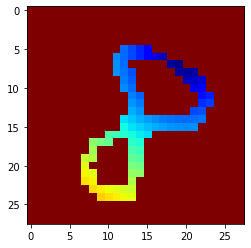

In [ ]:
from gtda.images import RadialFiltration

print(im8_binarized.shape)
#Radial Filtration takes n_smaples, height, width as input of images. So have to reshape
im8_binarized = im8_binarized.reshape(1, 28, 28)
print(im8_binarized.shape)
radial_model = RadialFiltration(center = np.array([20, 6]))
im8_filtered = radial_model.fit_transform(im8_binarized)
print(im8_filtered.shape)
#radial_model.plot(im8_filtered, colorscale = 'jet')
plt.imshow(im8_filtered.reshape(28, 28), cmap = 'jet')
plt.savefig('/content/drive/MyDrive/Github/TDA_on_MNIST/figures/filtered(radial)_8.png')

# Filtration
We can see from the resulting plot that we’ve effectively transformed our binary image into a greyscale one, where the pixel values increase as we move from the upper-right to bottom-left of the image! These pixel values can be used to define a filtration of cubical complexes $\{K_i\}_{i \in Im(I)}$, where  contains all pixels with value less than the th smallest pixel value in the greyscale image. In other words, $K_i$  is the th sublevel set of the image’s cubical complex K.

In [ ]:
from gtda.homology import CubicalPersistence
import plotly.io as pio
#%pip uninstall kaleido
#%pip install --upgrade kaleido
#%pip install --upgrade plotly
cubical_model = CubicalPersistence(n_jobs= -1)
im8_cubical = cubical_model.fit_transform(im8_filtered)

fig = cubical_model.plot(im8_cubical)
#plt.imshow(fig)
print(type(fig))
#pio.write_image(fig, '/content/drive/MyDrive/Github/TDA_on_MNIST/figures/persistenceDiagram_of_8.png', engine 'kaleido')
fig.show()

<class 'plotly.graph_objs._figure.Figure'>


In [ ]:
from gtda.diagrams import Scaler

scaler_model = Scaler()
im8_scaled = scaler_model.fit_transform(im8_cubical)

fig1 = scaler_model.plot(im8_scaled)
fig1.show()
fig1.write_image("/content/drive/MyDrive/Github/TDA_on_MNIST/figures/persistenceDiagram_of_8.png", engine = "kaleido")

# Vectorization of Persistence Values
Now, for the last step of the process, we need to vectorize the persistence values so that we  can use it as a machine learning features

In [ ]:
from gtda.diagrams import HeatKernel

heat = HeatKernel(sigma=.15, n_bins=60, n_jobs=-1)
im8_heat = heat.fit_transform(im8_scaled)

# Visualise the heat kernel for H1
fig2 = heat.plot(im8_heat, homology_dimension_idx=1, colorscale='jet')
fig2.show()
fig2.write_image("/content/drive/MyDrive/Github/TDA_on_MNIST/figures/heatKernel(dim1_of_8.png", engine = "kaleido")

In [ ]:
fig2 = heat.plot(im8_heat, homology_dimension_idx=0, colorscale='jet')
fig2.show()
fig2.write_image("/content/drive/MyDrive/Github/TDA_on_MNIST/figures/heatKernel(dim0)_of_8.png", engine = "kaleido")

#The Pipeline
Combining alll the steps in a single pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from gtda.diagrams import Amplitude

steps = [
    ("binarizer", Binarizer(threshold=0.4)),
    ("filtration", RadialFiltration(center=np.array([20, 6]))),
    ("diagram", CubicalPersistence()),
    ("rescaling", Scaler()),
    ("amplitude", Amplitude(metric="heat", metric_params={'sigma':0.15, 'n_bins':60}))
]

heat_pipeline = Pipeline(steps)

In [ ]:
img8_train = img8_train.reshape(1, 28, 28)
im8_pipeline = heat_pipeline.fit_transform(img8_train)
im8_pipeline

array([[0.07002548, 2.49730162]])

#Full blown Pipeline
To extract more features, we use use more extensive features, to make use more of topological features.

In [19]:
from sklearn.pipeline import make_pipeline, make_union
from gtda.diagrams import PersistenceEntropy
from gtda.images import HeightFiltration
from gtda.images import RadialFiltration
from gtda.homology import CubicalPersistence
from gtda.diagrams import Scaler
from gtda.diagrams import Amplitude

direction_list = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Listing all metrics we want to use to extract diagram amplitudes
metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]

#
feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)]
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)

In [ ]:
from sklearn import set_config
set_config(display='diagram')

tda_union

FeatureUnion(n_jobs=-1,
             transformer_list=[('pipeline-1',
                                Pipeline(steps=[('binarizer',
                                                 Binarizer(n_jobs=-1,
                                                           threshold=0.4)),
                                                ('heightfiltration',
                                                 HeightFiltration(direction=array([1, 0]),
                                                                  n_jobs=-1)),
                                                ('cubicalpersistence',
                                                 CubicalPersistence(n_jobs=-1)),
                                                ('scaler', Scaler(n_jobs=-1)),
                                                ('featureunion',
                                                 FeatureUnion(transformer_list=[('persistenceentropy',
                                                                                 Persist...
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-11',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-12',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-13',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1))]))]))])

In [20]:
#Turns out Colab CPU is not enough to train 60000 pictures of MNIST
#But Code is working fine
#Tried it with 6000 images
X_train_tda = tda_union.fit_transform(X_train)
X_train_tda.shape

(6000, 476)

In [21]:
X_train_tda_DF = DF = pd.DataFrame(X_train_tda)
X_train_tda_DF.to_csv('/content/drive/MyDrive/Github/TDA_on_MNIST/data/X_train_tda.csv')

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train)

X_test_tda = tda_union.transform(X_test)
X_test_tda_DF = pd.DataFrame(X_test_tda)
X_test_tda_DF.to_csv('/content/drive/MyDrive/Github/TDA_on_MNIST/data/X_test_tda.csv')
rf.score(X_test_tda, y_test)

0.931

In [25]:
params = rf.get_params()
#print(f'Shape of parameters {params.shape}')
params 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns 
y_pred_test = rf.predict(X_test_tda)
y_pred_test_DF = pd.DataFrame(y_pred_test)
y_pred_test_DF.to_csv('/content/drive/MyDrive/Github/TDA_on_MNIST/data/y_pred_test.csv')



print(accuracy_score(y_true= y_test, y_pred = y_pred_test))

#Evaluation 

0.931


In [35]:
print(classification_report(y_test, y_pred_test))
with open('/content/drive/MyDrive/Github/TDA_on_MNIST/results_log/classification_report(random_forest).txt', 'w') as writefile:
    writefile.write(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        99
           1       0.97      0.95      0.96       113
           2       0.94      0.94      0.94       100
           3       0.94      0.89      0.91       102
           4       0.95      0.92      0.93        97
           5       0.90      0.88      0.89        90
           6       0.90      0.93      0.91        98
           7       0.91      0.98      0.94       104
           8       0.89      0.91      0.90        98
           9       0.94      0.94      0.94        99

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [37]:
with open('/content/drive/MyDrive/Github/TDA_on_MNIST/results_log/classification_report(random_forest).txt', 'r') as testwritefile:
    print(testwritefile.read())

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        99
           1       0.97      0.95      0.96       113
           2       0.94      0.94      0.94       100
           3       0.94      0.89      0.91       102
           4       0.95      0.92      0.93        97
           5       0.90      0.88      0.89        90
           6       0.90      0.93      0.91        98
           7       0.91      0.98      0.94       104
           8       0.89      0.91      0.90        98
           9       0.94      0.94      0.94        99

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



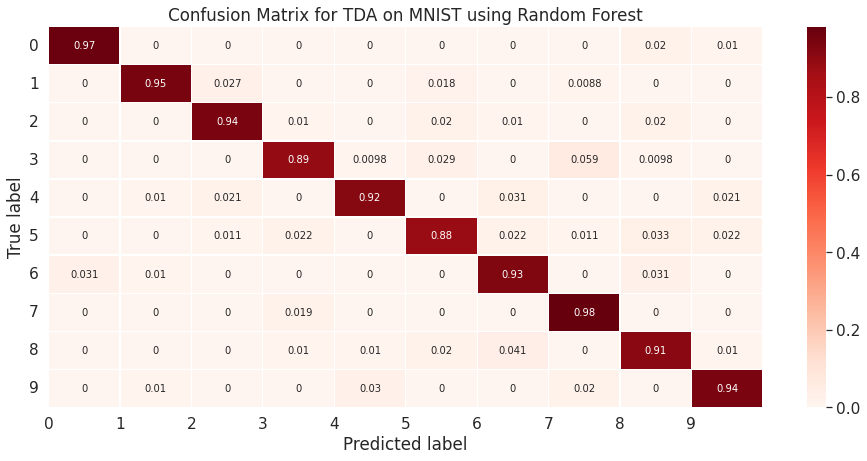

In [38]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for TDA on MNIST using Random Forest')
plt.savefig('/content/drive/MyDrive/Github/TDA_on_MNIST/results_log/confusion_matrix(random_forest).png')
plt.show()

In [39]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train_tda, y_train)

y_pred_test_xgb = xgb_model.predict(X_test_tda)
y_pred_test_xgb_DF = pd.DataFrame(y_pred_test_xgb)
y_pred_test_xgb_DF.to_csv('/content/drive/MyDrive/Github/TDA_on_MNIST/data/y_pred_test(xgb).csv')


In [40]:
print(accuracy_score(y_test, y_pred_test_xgb))
with open('/content/drive/MyDrive/Github/TDA_on_MNIST/results_log/classification_report(xgb).txt', 'w') as writefile:
    writefile.write(classification_report(y_test, y_pred_test_xgb))

0.931


In [41]:
with open('/content/drive/MyDrive/Github/TDA_on_MNIST/results_log/classification_report(xgb).txt', 'r') as testwritefile:
    print(testwritefile.read())

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        99
           1       0.96      0.94      0.95       113
           2       0.89      0.93      0.91       100
           3       0.97      0.95      0.96       102
           4       0.96      0.93      0.94        97
           5       0.89      0.88      0.88        90
           6       0.95      0.96      0.95        98
           7       0.90      0.91      0.91       104
           8       0.89      0.90      0.89        98
           9       0.90      0.94      0.92        99

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



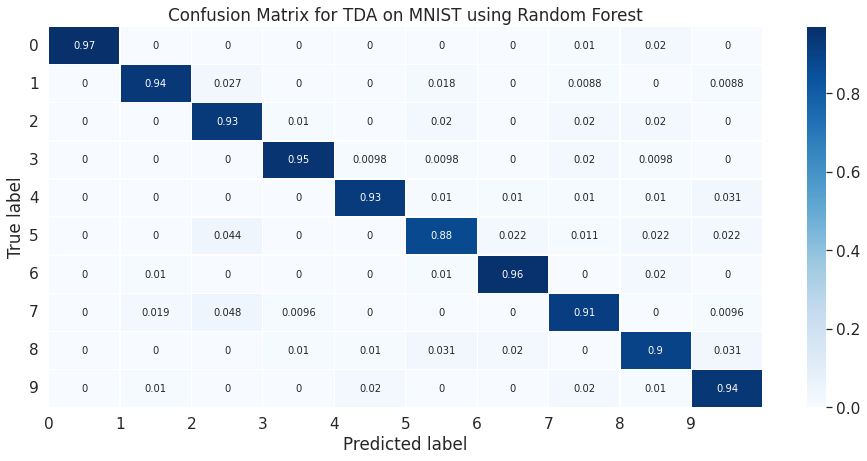

In [42]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test_xgb)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for TDA on MNIST using Random Forest')
plt.savefig('/content/drive/MyDrive/Github/TDA_on_MNIST/results_log/confusion_matrix(xgb).png')
plt.show()

In [3]:
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn import set_config
import numpy as np 
from gtda.images import Binarizer
from gtda.images import RadialFiltration
from gtda.images import HeightFiltration
from gtda.images import DensityFiltration
from gtda.homology import CubicalPersistence
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import Scaler
from gtda.diagrams import Amplitude
from gtda.diagrams import PersistenceEntropy


#Parameters for various grayscale filtration
direction_list = [[1, 0], [1, 1], [0, 1],
                      [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]


center_list = [
        [13, 6],
        [6, 13],
        [13, 13],
        [20, 13],
        [13, 20],
        [6, 6],
        [6, 20],
        [20, 6],
        [20, 20],
    ]

neighbor_list = [2, 4, 6]

    #Metric List for Vectorization of persistence diagram
metric_list = [
        {"metric": "bottleneck", "metric_params": {}},
        {"metric": "wasserstein", "metric_params": {"p": 1}},
        {"metric": "wasserstein", "metric_params": {"p": 2}},
        {"metric": "landscape", "metric_params": {
            "p": 1, "n_layers": 1, "n_bins": 100}},
        {"metric": "landscape", "metric_params": {
            "p": 1, "n_layers": 2, "n_bins": 100}},
        {"metric": "landscape", "metric_params": {
            "p": 2, "n_layers": 1, "n_bins": 100}},
        {"metric": "landscape", "metric_params": {
            "p": 2, "n_layers": 2, "n_bins": 100}},
        {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
        {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
        {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
        {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
        {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
        {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
    ]


filtration_list = (
        [
            HeightFiltration(direction=np.array(direction), n_jobs=-1)
            for direction in direction_list
        ]
        + [RadialFiltration(center=np.array(center), n_jobs=-1)
        for center in center_list]

        +[DensityFiltration(neighbor, n_jobs = -1)
        for neighbor in neighbor_list]
    )

#filtration_list.append(None)

diagram_steps = [
        [
            Binarizer(threshold=0.4, n_jobs=-1),
            filtration,
            CubicalPersistence(n_jobs=-1),
            Scaler(n_jobs=-1),
        ]
        for filtration in filtration_list
    ]

diagram_steps_without_filtration = [Binarizer(threshold=0.4, n_jobs=-1),
                                        CubicalPersistence(n_jobs = -1),
                                        Scaler(n_jobs = -1)]

    
diagram_steps_with_vietoris = [Binarizer(threshold = 0.4, n_jobs = -1),
                                    VietorisRipsPersistence(n_jobs = -1),
                                    Scaler(n_jobs = -1)
                                    ]

feature_union = make_union(
        *[PersistenceEntropy(nan_fill_value=-1)]
        + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
    )


tda_union = make_union(
        *[[make_pipeline(*diagram_step, feature_union)
        for diagram_step in diagram_steps]
        + [make_pipeline(*diagram_steps_without_filtration, feature_union)]
        + [make_pipeline(*diagram_steps_with_vietoris, feature_union)]],
        n_jobs=-1
    )

set_config(display='diagram')
tda_union

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'gtda'